In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph




from sklearn.linear_model import LogisticRegression # Logistic regression model
from sklearn.model_selection import train_test_split # to split the data into training and test set
from sklearn.model_selection import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter of models
from sklearn.ensemble import RandomForestClassifier # for random forest classifier model
from sklearn.neighbors import KNeighborsClassifier # for K Neighbors model
from sklearn.tree import DecisionTreeClassifier # for Decision Tree model
from sklearn import svm # for Support Vector Machine model
from sklearn import metrics # for the check the error and accuracy of the model

### Read the data



In [3]:
### Read the data
data=pd.read_csv("C:\\Users\\surface\\project1\\data\\data.csv") # import from a csv file
data.drop("Unnamed: 32",axis=1,inplace=True) # delete unnecessary columns

In [8]:
#### transform the problem into binary classification : Malignant = 1 ans Benign = 0 ###
data['diagnosis']=data['diagnosis'].replace({'M':1,'B':0}) 
data.head(5) # show data

C:\Users\surface\AppData\Local\Temp\ipykernel_3304\1748497345.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['diagnosis']=data['diagnosis'].replace({'M':1,'B':0})


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# the data can be divided into three parts corresponding to 3 dimensional features '(mean, se, worst)' 
# computed with the  the 3 dimensonial values (X,Y,Z)

features_mean= list(data.columns[2:12]) # mean group
features_se= list(data.columns[12:22]) # standard error group
features_worst=list(data.columns[22:32]) # features_worst group

print("-----------------------------------")
print('Mean set of all features')
print(features_mean)
print(len(features_mean), 'features')
print("-----------------------------------")
print('Standard Error set of all features')
print(features_se)
print(len(features_se), 'features')
print("------------------------------------")
print('Worst set of all features')
print(features_worst)
print(len(features_worst), 'features')
print(' ')
print('Description of data columns')
data.iloc[:,1:].describe() # description of all columns in the dataset (30 features + diagnosis)

-----------------------------------
Mean set of all features
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
10 features
-----------------------------------
Standard Error set of all features
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
10 features
------------------------------------
Worst set of all features
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
10 features
 
Description of data columns


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


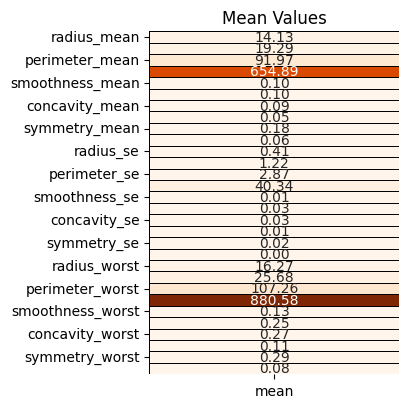

In [4]:
#mean value 
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5))

colors = ['#FF781F','#2D2926']
plt.subplot(1,1,1)
sns.heatmap(data.iloc[:,1:].describe().T[['mean']],cmap = 'Oranges',annot = True,fmt = '.2f',linecolor = 'black',linewidths = 0.4,cbar = False);
plt.title('Mean Values');

fig.tight_layout(pad = 4)

C:\Users\surface\AppData\Local\Temp\ipykernel_3304\1253270993.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=data, palette='Set2', ax=axes[row, col])
C:\Users\surface\AppData\Local\Temp\ipykernel_3304\1253270993.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=data, palette='Set2', ax=axes[row, col])
C:\Users\surface\AppData\Local\Temp\ipykernel_3304\1253270993.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=data, palette='Set2', ax=ax

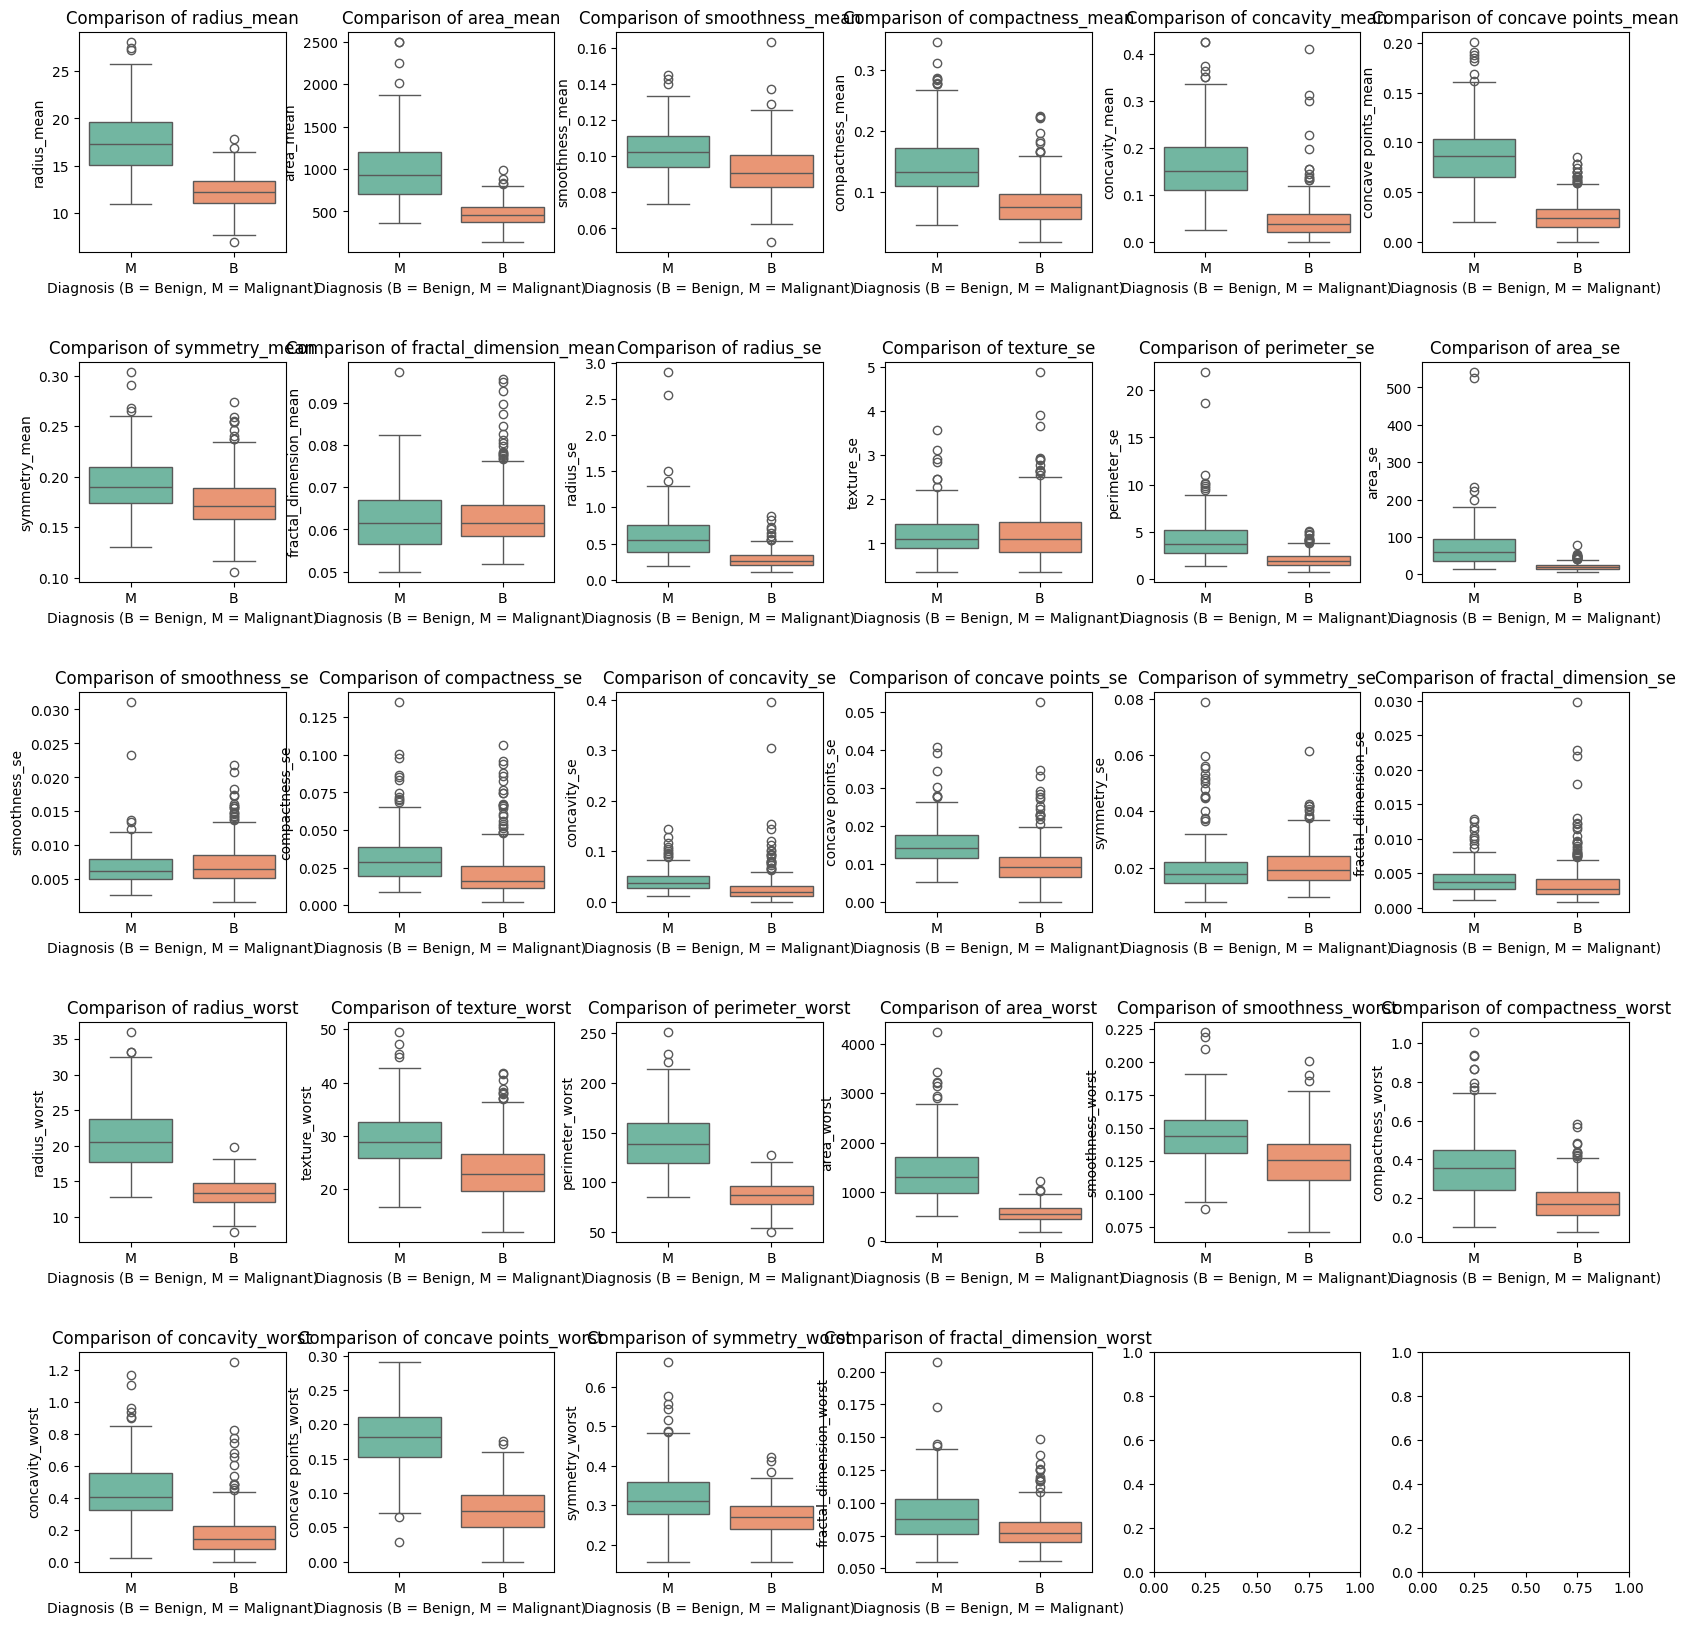

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['radius_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
            'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
            'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 20))  
for i, feature in enumerate(features):
    row = i // 6 
    col = i % 6  
    sns.boxplot(x='diagnosis', y=feature, data=data, palette='Set2', ax=axes[row, col])
    axes[row, col].set_title(f'Comparison of {feature}')
    axes[row, col].set_xlabel('Diagnosis (B = Benign, M = Malignant)')
    axes[row, col].set_ylabel(feature)

plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()


<Axes: >

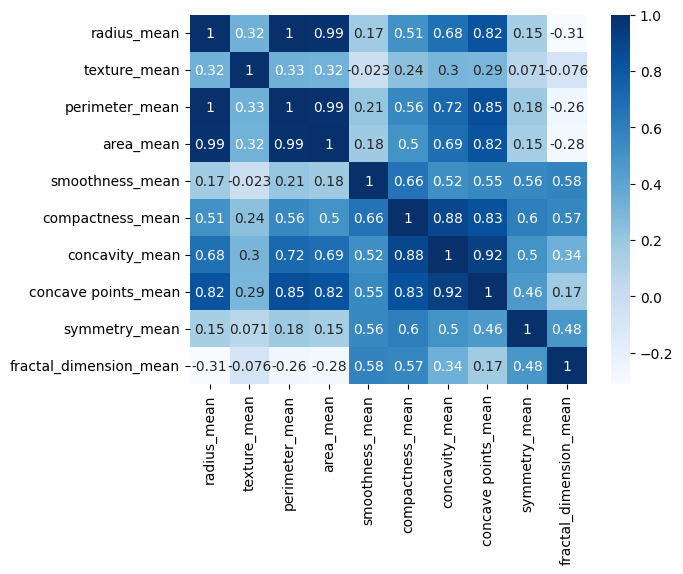

In [9]:


    #Study of the correlations between the 10 variables of the 3 groups.
    #The darker a box is, the more the 2 associated features are correlated.


sns.heatmap(data[features_mean].corr(),annot=True,cmap='Blues')




<Axes: >

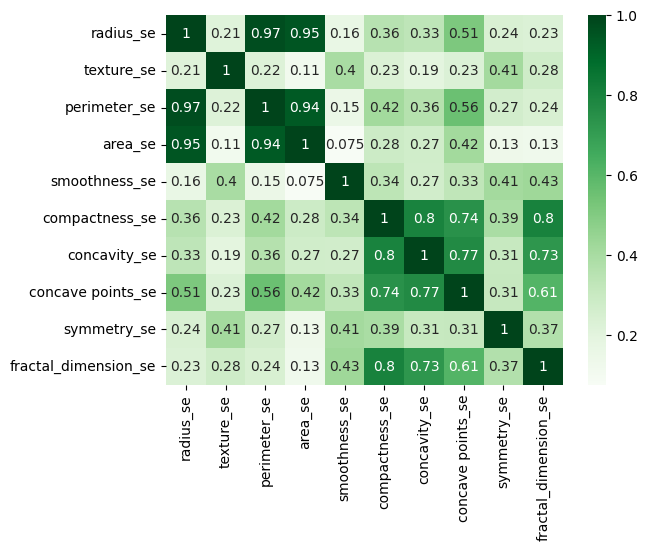

In [11]:
sns.heatmap(data[features_se].corr(),annot=True,cmap='Greens')


<Axes: >

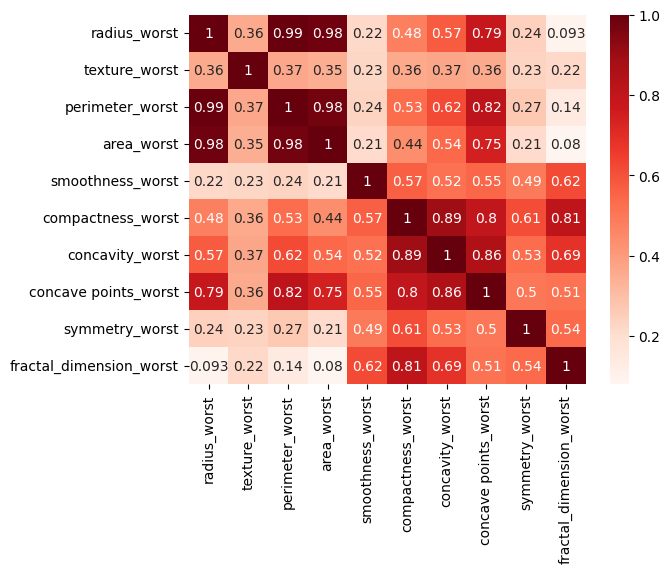

In [10]:
sns.heatmap(data[features_worst].corr(),annot=True,cmap='Reds')

In [12]:
#####  delete features higly corrolated described above  ###########

col_to_drop_corrolated1=['radius_mean','radius_se','radius_worst','area_mean','area_se','area_worst']
col_to_drop_corrolated2=['concavity_mean','concave points_mean', 'concavity_se','concave points_se' ,'concavity_worst','concave points_worst']
data.drop(col_to_drop_corrolated1+col_to_drop_corrolated2,axis=1,inplace=True)
print('I keep only ', len(data.columns) ,' features which are not so corrolated based on the previous analysis')

I keep only  20  features which are not so corrolated based on the previous analysis


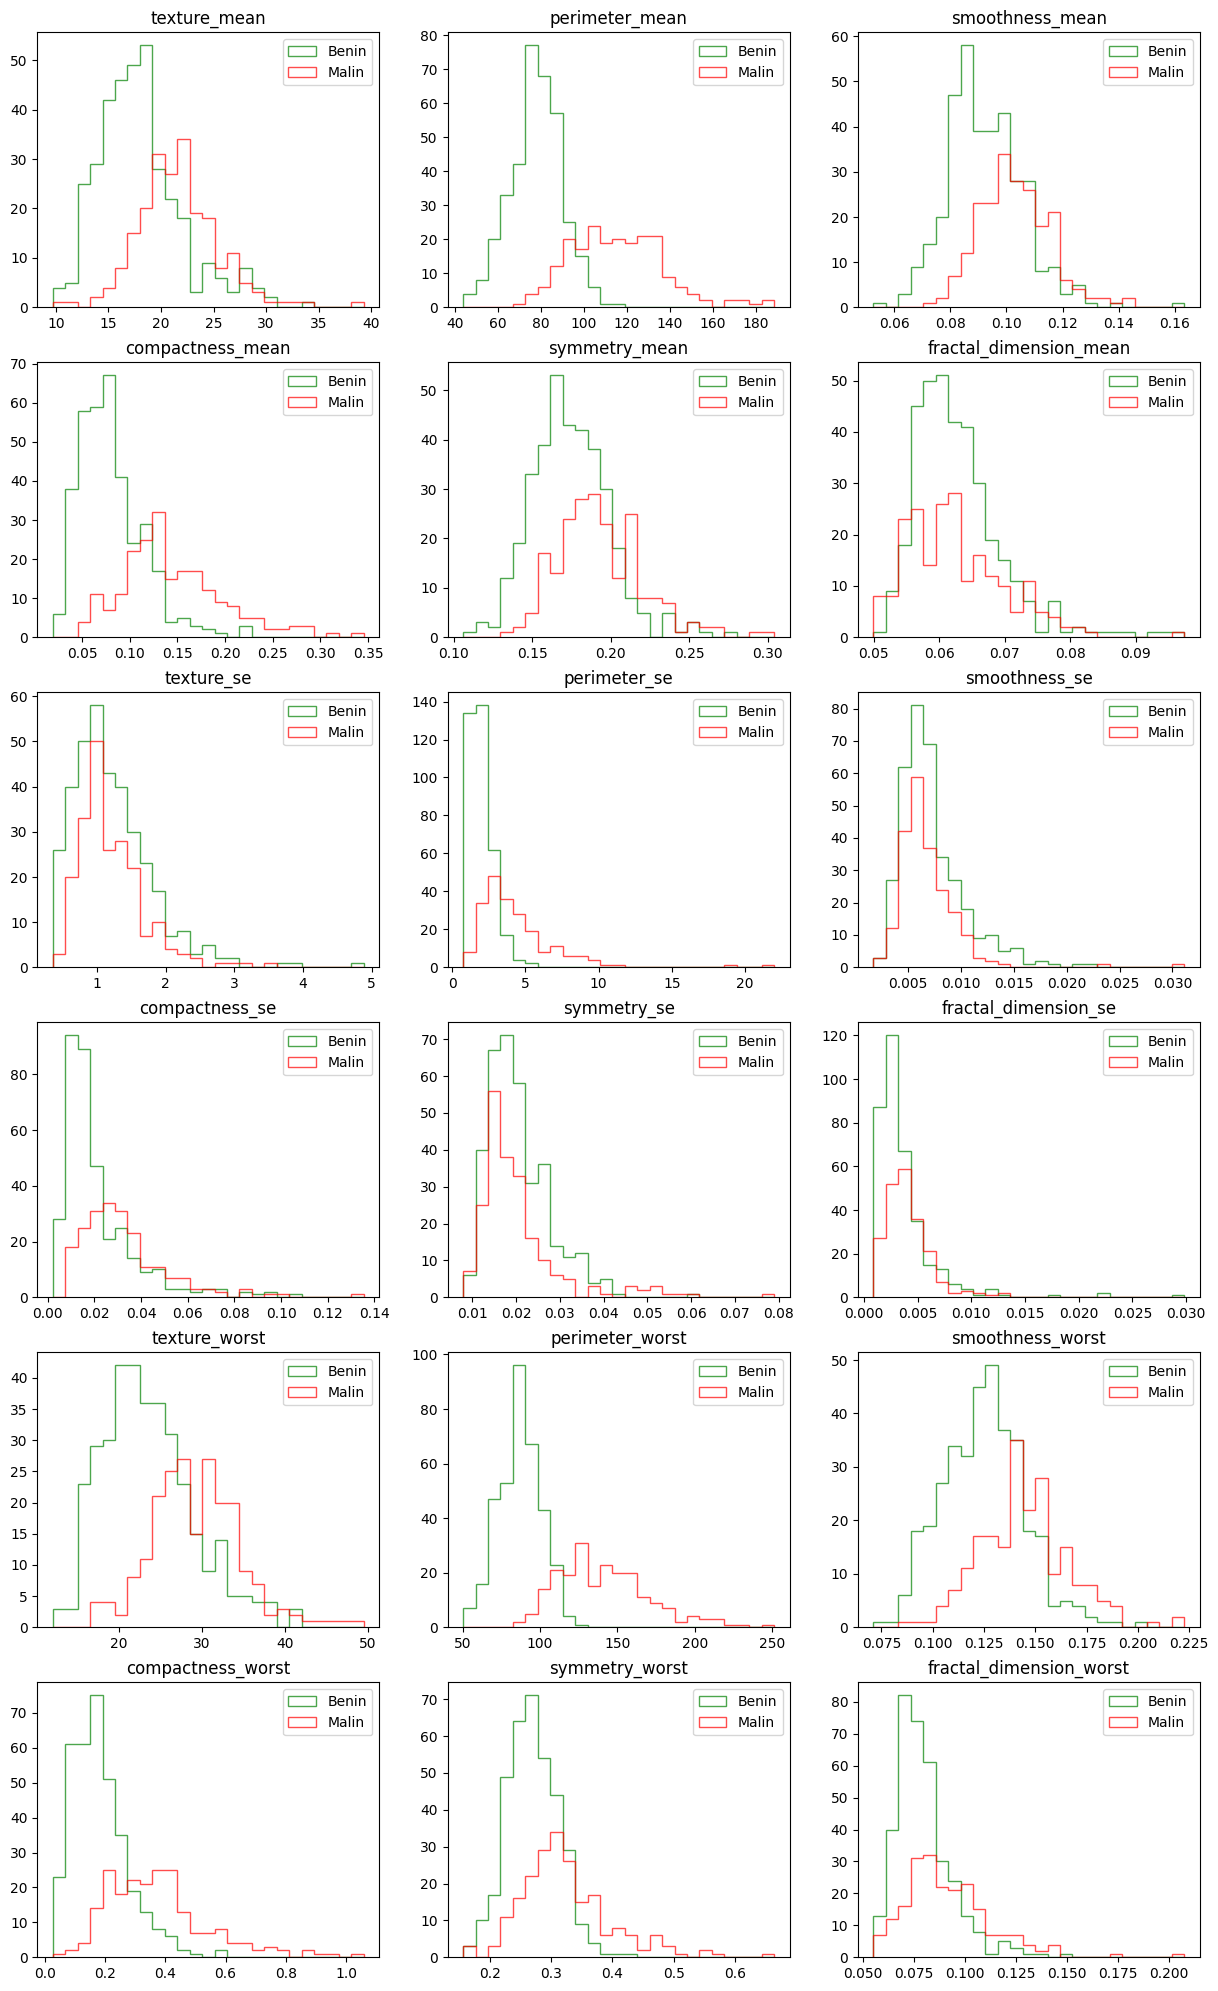

In [13]:
predict = data.diagnosis.unique() # unique values from diagnosis features : 1 and 0
predict_n=['Malin', 'Benin'] # labels

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15,25)) # axis configuration : 18 features on 6 * 3 charts
i=0
axes = axes.ravel()
for idx,ax in enumerate(axes): # for each chart
    col=data.columns[i+2]
    i=i+1
    ax.hist([data.loc[data.diagnosis == x, col] for x in predict], label=predict_n, bins=25,stacked=False, alpha=0.7,color=['r','g'], histtype='step') # plot the feature histogram 
    ax.legend(loc='upper right') # legend of each chart
    ax.set_title(col) # title

plt.show() # show the 18 charts

In [14]:
col_to_drop_mean=['fractal_dimension_mean', 'symmetry_mean', 'smoothness_mean', 'texture_mean'] # mean variables not efficient for detection
col_to_drop_se=['fractal_dimension_se', 'symmetry_se', 'smoothness_se', 'texture_se'] # Standard error variables not efficient for detection
col_to_drop_worst=['fractal_dimension_worst'] # Worst variable not efficient for detection
col_to_drop_tot=col_to_drop_mean+col_to_drop_se+col_to_drop_worst
data.drop(col_to_drop_tot,axis=1,inplace=True)
print('Now the data set is only composed of ', len(data.columns), 'features')

Now the data set is only composed of  11 features


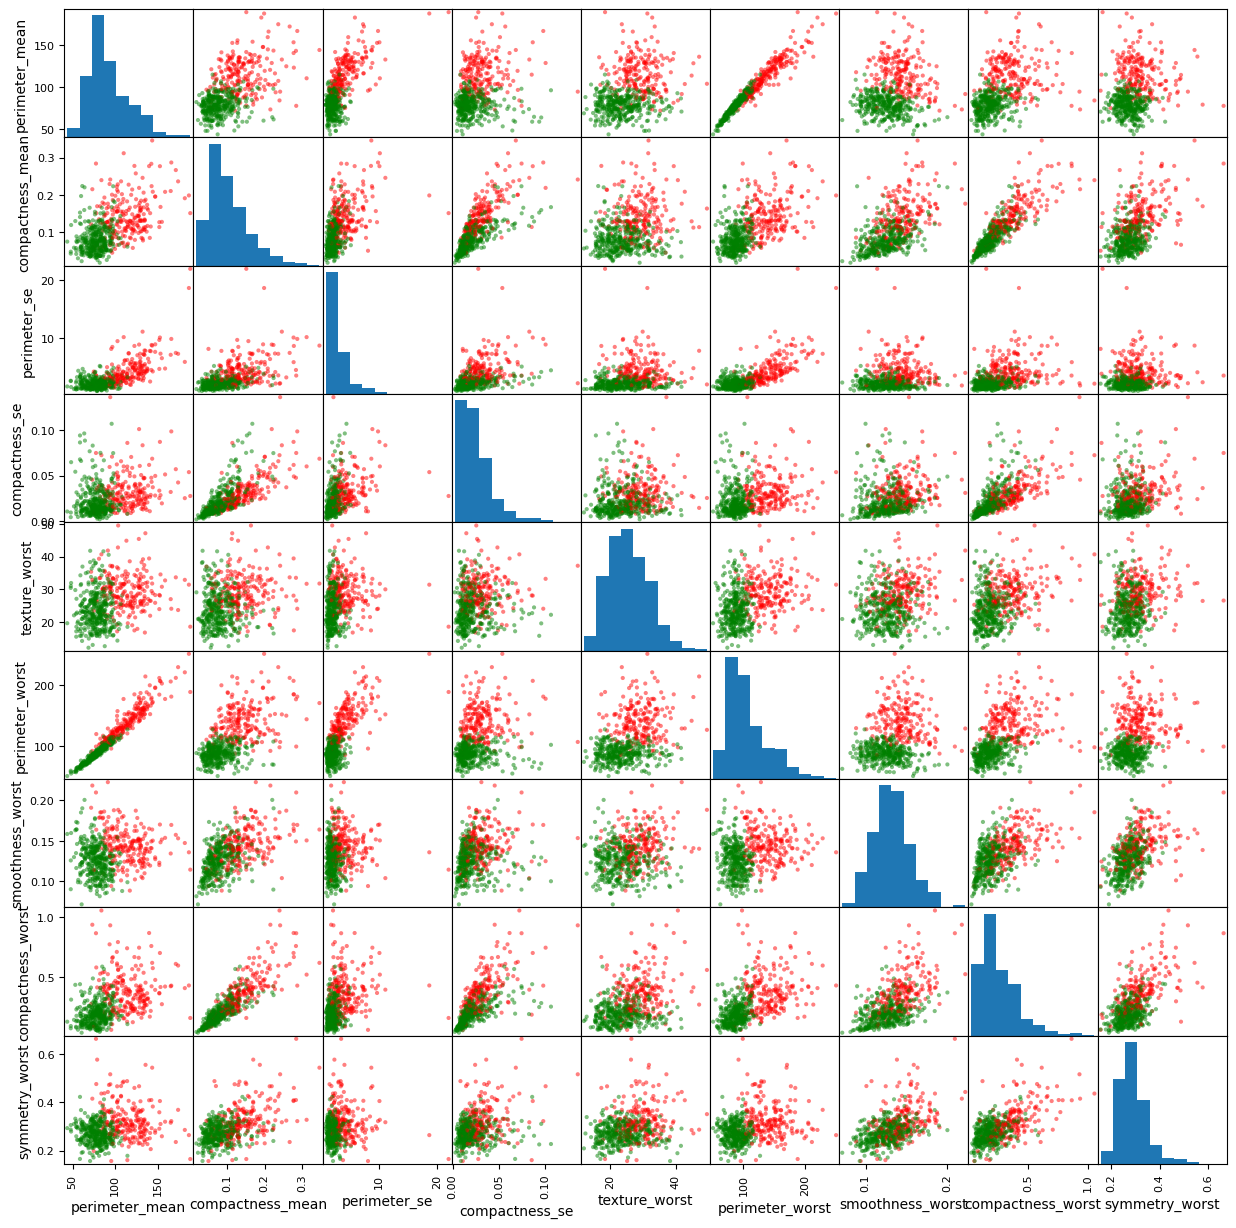

In [15]:
color_function = {0: "green", 1: "red"} # Here Red color will be 1 which means M and blue foo 0 means B
colors = data["diagnosis"].map(lambda x: color_function.get(x))# mapping the color fuction with diagnosis column
pd.plotting.scatter_matrix(data.iloc[:,2:], c=colors, alpha = 0.5, figsize = (15, 15)); # plotting scatter plot matrix

In [63]:
selected_features = data.iloc[:, 2:].columns
print("varialbes:", selected_features)
print("numbers:", len(selected_features))



varialbes: Index(['perimeter_mean', 'compactness_mean', 'perimeter_se', 'compactness_se',
       'texture_worst', 'perimeter_worst', 'smoothness_worst',
       'compactness_worst', 'symmetry_worst'],
      dtype='object')
numbers: 9


In [117]:
from sklearn.preprocessing import StandardScaler # To norm the data
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc, classification_report
from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Define the list of features to be used for prediction (input variables)
prediction_var = ['perimeter_mean', 'compactness_mean', 'perimeter_se', 'compactness_se',
                  'texture_worst', 'perimeter_worst', 'smoothness_worst',
                  'compactness_worst', 'symmetry_worst']  # Replace with actual feature column names

# Define the outcome variable (target variable)
outcome_var = 'diagnosis'  # Replace with your actual target column name

# Function for classification model training and evaluation
def classification_model(model, data, prediction_var, outcome_var):
    X = data[prediction_var]
    y = data[outcome_var]


    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

    sc = StandardScaler()  
    sc.fit(X_train)  # 
    X_train = sc.transform(X_train)  
    X_test = sc.transform(X_test)  # 
    model.fit(X_train,y_train) #Here we fit the model using training set

 # Cross validation on 5 random folds 
    kf = KFold(n_splits=5, shuffle=True, random_state=12)
    
    error = []
    print(kf)
    print('  ')

# For each folds, we fit the model and compute the accuracy, to prevent overfitting
    for train, test in kf.split(data):
        # as the data is divided into train and test using KFold
        # so here also we are going to fit model
        #in the cross validation the data in train and test will change for evry iteration
        X_train = (data[prediction_var].iloc[train,:])# this iloc method is used for selecting trainig data
        y_train = data[outcome_var].iloc[train]# here is only column so it repersenting only row in train
        X_train = sc.transform(X_train) # Scale the train data
        
        
        # compute the score on test set
        error.append(model.score(X_test,y_test))

      # printing the score 
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

   
    
    

    # Evaluate the model
    evaluation_metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    }
    
    # display matrics
    eval_df = pd.DataFrame([evaluation_metrics])

    # confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=[1, 0])  # LABAL
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Malignant', 'Benign'])
    disp.plot(cmap='Blues')

    # ROC CURVE
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)  # ROC 
    roc_auc = auc(fpr, tpr)  #AUC 

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()



    return eval_df




               


KFold(n_splits=5, random_state=12, shuffle=True)
  
Cross-Validation Score : 95.614%
Cross-Validation Score : 95.614%
Cross-Validation Score : 95.614%
Cross-Validation Score : 95.614%
Cross-Validation Score : 95.614%


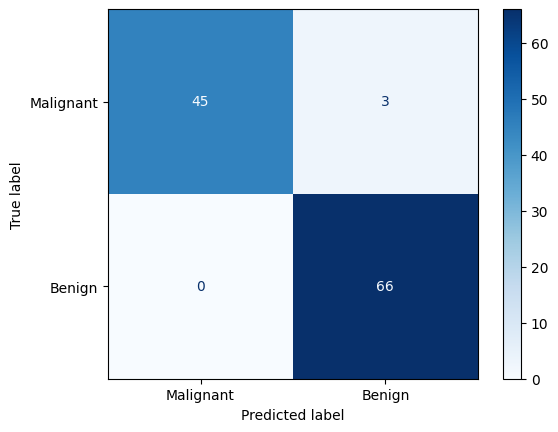

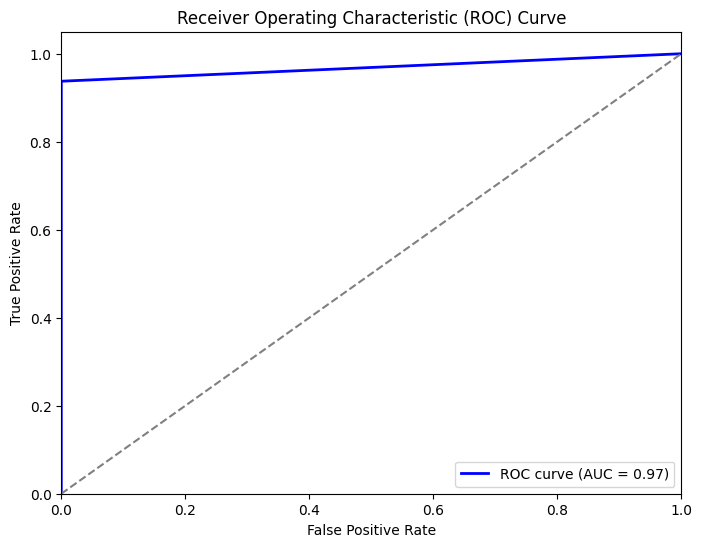

   Accuracy  Precision  Recall  F1 Score  ROC AUC
0  0.973684        1.0  0.9375  0.967742  0.99053


In [125]:

# Create a Logistic Regression model
lg_model = LogisticRegression(max_iter=10000)

# Call the classification_model function
eval_df = classification_model(lg, data, prediction_var, outcome_var)

# Print the evaluation results
print(eval_df)

KFold(n_splits=5, random_state=12, shuffle=True)
  
Cross-Validation Score : 88.596%
Cross-Validation Score : 88.596%
Cross-Validation Score : 88.596%
Cross-Validation Score : 88.596%
Cross-Validation Score : 88.596%


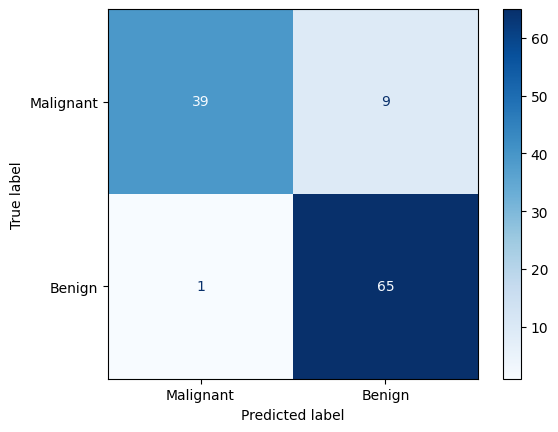

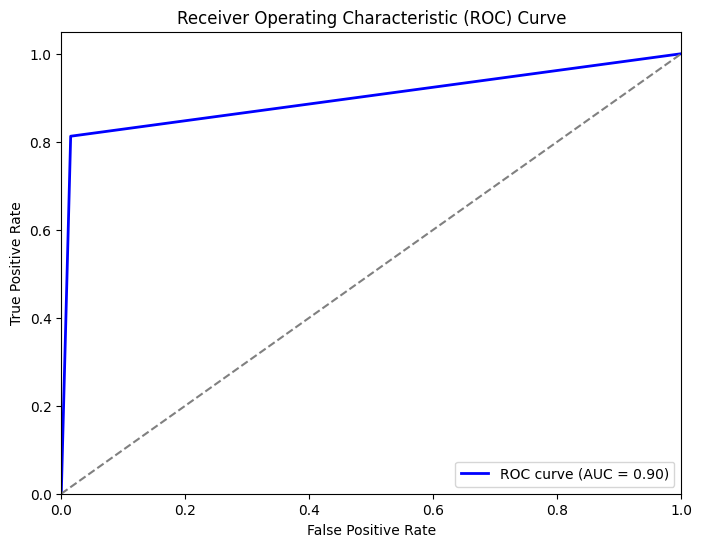

   Accuracy  Precision  Recall  F1 Score   ROC AUC
0  0.912281      0.975  0.8125  0.886364  0.917298


In [126]:
# Create a DecisionTreeClassifier model
dt_model = DecisionTreeClassifier(ccp_alpha=0.02)

# Call the classification_model function
eval_df = classification_model(dt_model, data, prediction_var, outcome_var)

# Print the evaluation results
print(eval_df)

KFold(n_splits=5, random_state=12, shuffle=True)
  
Cross-Validation Score : 93.860%
Cross-Validation Score : 93.860%
Cross-Validation Score : 93.860%
Cross-Validation Score : 93.860%
Cross-Validation Score : 93.860%


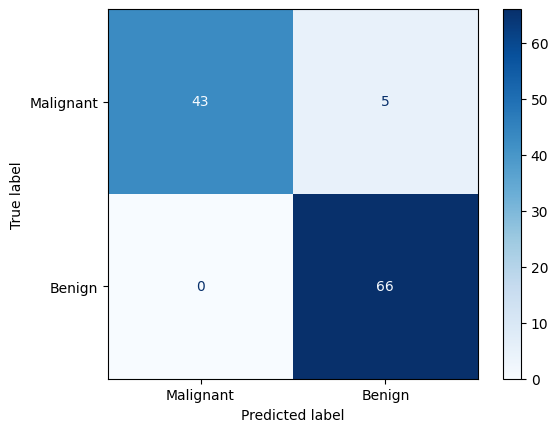

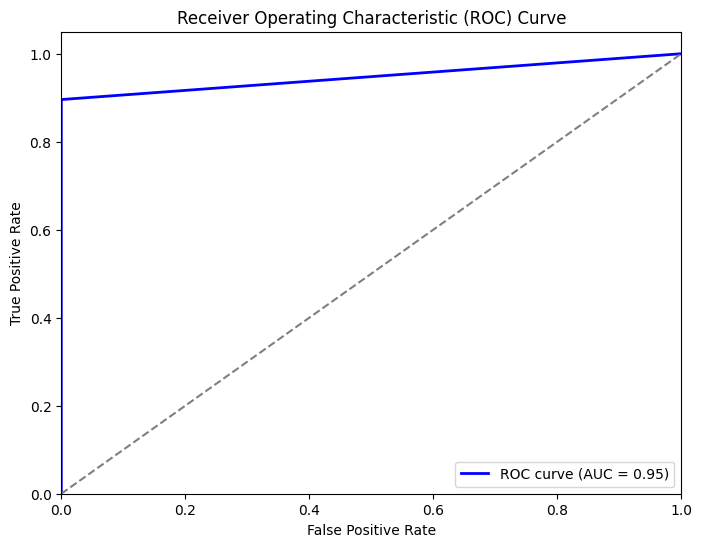

,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,0.95614,1.0,0.895833,0.945055,0.991319


In [128]:
kn_model = KNeighborsClassifier()
classification_model(kn_model,data,prediction_var,outcome_var)

KFold(n_splits=5, random_state=12, shuffle=True)
  
Cross-Validation Score : 93.860%
Cross-Validation Score : 93.860%
Cross-Validation Score : 93.860%
Cross-Validation Score : 93.860%
Cross-Validation Score : 93.860%


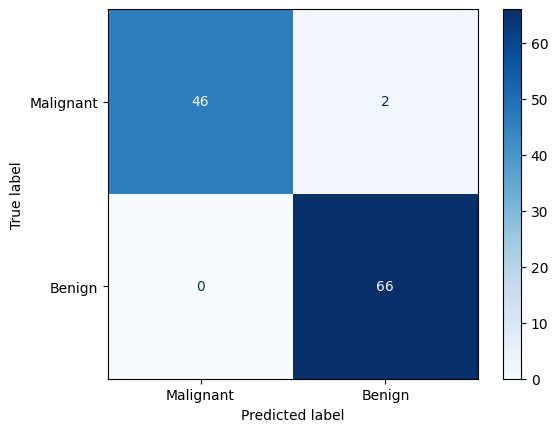

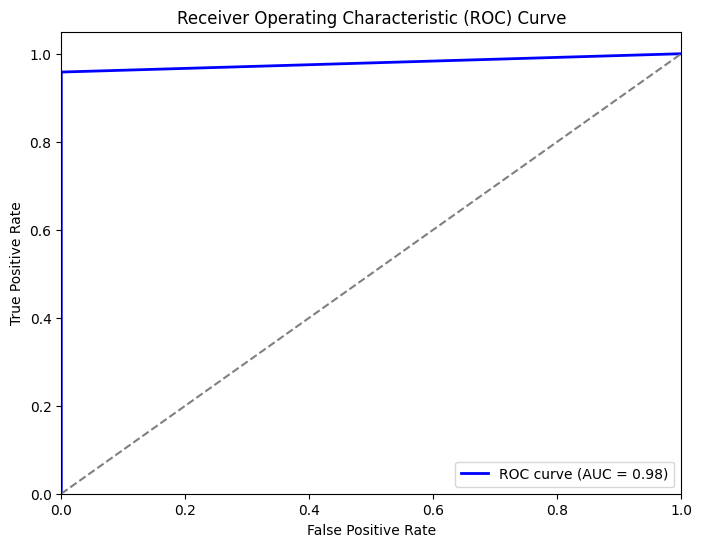

,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,0.982456,1.0,0.958333,0.978723,0.999684


In [129]:
rf_model = RandomForestClassifier(n_estimators=100, min_samples_split=10)
classification_model(rf_model,data,prediction_var,outcome_var)

KFold(n_splits=5, random_state=12, shuffle=True)
  
Cross-Validation Score : 94.737%
Cross-Validation Score : 94.737%
Cross-Validation Score : 94.737%
Cross-Validation Score : 94.737%
Cross-Validation Score : 94.737%


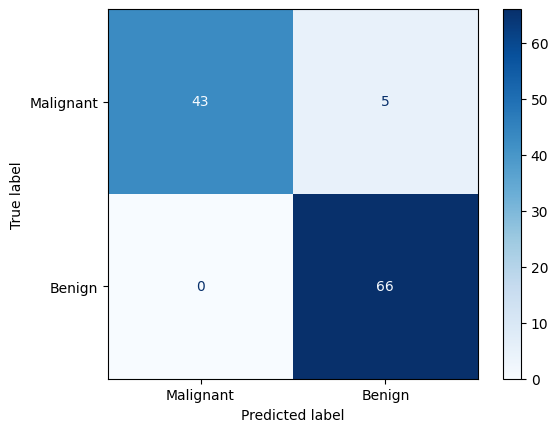

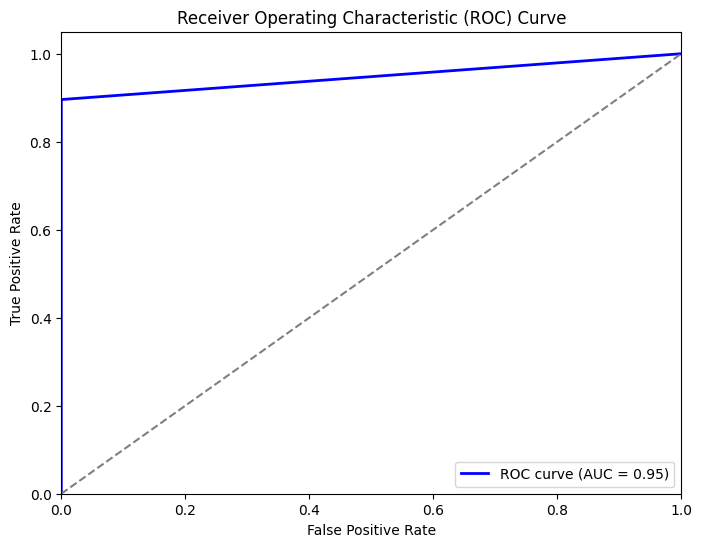

,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,0.95614,1.0,0.895833,0.945055,0.998106


In [130]:
svm_model = svm.SVC(probability=True)
classification_model(svm_model,data,prediction_var,outcome_var)

In [131]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Function for Grid Search with Cross-Validation
def classification_model_gridsearchCV(model, param_grid, data_X, data_y, cv=5):
    """
    Perform Grid Search with Cross-Validation.

    Parameters:
        model : sklearn model (e.g., SVM)
        param_grid : dict, hyperparameters to tune
        data_X : array-like, training feature data
        data_y : array-like, training labels
        cv : int, number of cross-validation folds (default = 5)

    Returns:
        best_params : dict, best hyperparameters
        best_score : float, best accuracy score
        best_model : trained model with best parameters
    """

    clf = GridSearchCV(model, param_grid, cv=cv, scoring="accuracy", n_jobs=-1, verbose=1)
    clf.fit(data_X, data_y)

    best_params = clf.best_params_
    best_score = clf.best_score_
    best_model = clf.best_estimator_

    print(f"Best Parameters: {best_params}")
    print(f"Best Accuracy: {best_score:.4f}")

    return best_params, best_score, best_model


# ==== Step 1: Load and Split Data ====
train, test = train_test_split(data, test_size=0.3, random_state=42, stratify=data['diagnosis'])

# Select input features and target variable
train_X = train[prediction_var].copy()
train_y = train['diagnosis'].copy()
test_X = test[prediction_var].copy()
test_y = test['diagnosis'].copy()

# ==== Step 2: Normalize Data ====
sc = StandardScaler()
train_X = sc.fit_transform(train_X)  # Fit on training set and transform
test_X = sc.transform(test_X)  # Only transform test set (no fit to avoid data leakage)

# ==== Step 3: Define SVM Hyperparameter Grid ====
param_grid = {
    'C': [0.65, 0.75, 0.8, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# ==== Step 4: Run GridSearchCV ====
v_model = svm.SVC()
best_params, best_score, best_model = classification_model_gridsearchCV(v_model, param_grid, train_X, train_y)

# ==== Step 5: Evaluate the Best Model on Test Data ====
test_predictions = best_model.predict(test_X)

test_accuracy = accuracy_score(test_y, test_predictions)
test_f1 = f1_score(test_y, test_predictions)
test_precision = precision_score(test_y, test_predictions)
test_recall = recall_score(test_y, test_predictions)

print("\n=== Model Evaluation on Test Set ===")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 0.65, 'kernel': 'rbf'}
Best Accuracy: 0.9672

=== Model Evaluation on Test Set ===
Test Accuracy: 0.9649
Test F1 Score: 0.9516
Test Precision: 0.9833
Test Recall: 0.9219


Epoch 1/100


c:\Users\surface\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6855 - loss: 0.6131 - val_accuracy: 0.8947 - val_loss: 0.3330
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9192 - loss: 0.2872 - val_accuracy: 0.9386 - val_loss: 0.1871
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9418 - loss: 0.1416 - val_accuracy: 0.9474 - val_loss: 0.1253
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9766 - loss: 0.0946 - val_accuracy: 0.9386 - val_loss: 0.1001
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9761 - loss: 0.0674 - val_accuracy: 0.9298 - val_loss: 0.0904
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9636 - loss: 0.0821 - val_accuracy: 0.9386 - val_loss: 0.0897
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9647 - loss: 0.1288 - val_accuracy: 0.9386 - val_loss: 0.0794
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9740 - loss: 0.0992 - val_accuracy: 0.9474 - val_loss: 0.

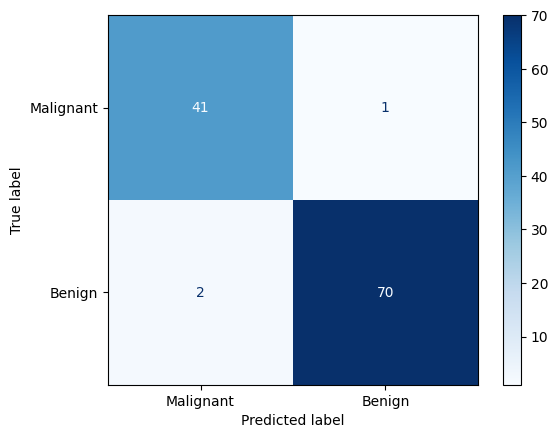

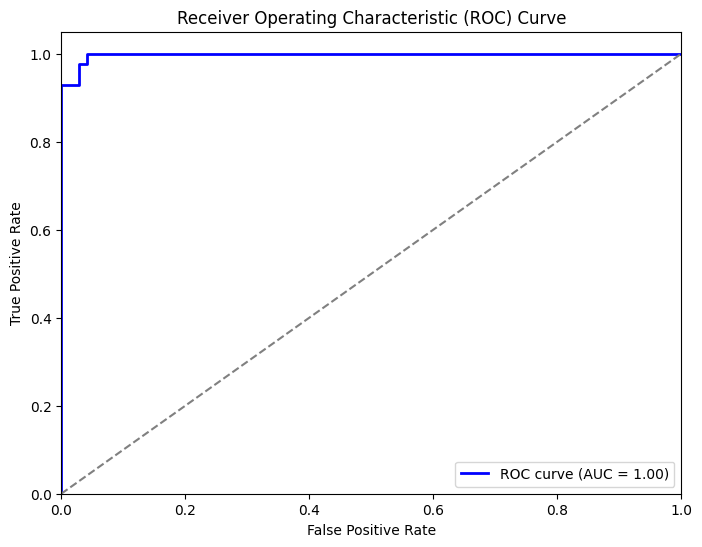

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import auc

# Select features for prediction
prediction_var = ['perimeter_mean', 'compactness_mean', 'perimeter_se', 'compactness_se',
                  'texture_worst', 'perimeter_worst', 'smoothness_worst',
                  'compactness_worst', 'symmetry_worst']  

# Target variable (0 = Benign, 1 = Malignant)
outcome_var = 'diagnosis'

# Data Preprocessing
X = data[prediction_var]
y = data[outcome_var]

# Ensure target variable is numeric (0 and 1)
y = y.apply(pd.to_numeric, errors='coerce')

# Standardize data (important for ANN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=12, stratify=y)

# Build Optimized ANN Model
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Increased neurons in the input layer
    Dropout(0.3),  # Increased Dropout to prevent overfitting
    Dense(64, activation='relu'),  # Hidden layer with more neurons
    Dropout(0.3),
    Dense(32, activation='relu'),  # Hidden layer with more neurons
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer (Sigmoid activation for binary classification)
])

# Compile the model with adjusted learning rate
optimizer = Adam(learning_rate=0.001)  # Adjusting learning rate
ann_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate the Model
y_pred_prob = model.predict(X_test).flatten()  # Get probability predictions
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to binary predictions

# Compute evaluation metrics
evaluation_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
    'ROC AUC': roc_auc_score(y_test, y_pred_prob)
}
eval_df = pd.DataFrame([evaluation_metrics])

# Display metrics
print(eval_df)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])  # Labels [1, 0] for Malignant and Benign
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Malignant', 'Benign'])
disp.plot(cmap='Blues')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  # ROC
roc_auc = auc(fpr, tpr)  # AUC

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Epoch 1/100


C:\Users\surface\AppData\Local\Temp\ipykernel_3304\3755791693.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['diagnosis']=data['diagnosis'].replace({'M':1,'B':0})
c:\Users\surface\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6452 - loss: 0.6239 - val_accuracy: 0.9298 - val_loss: 0.2604
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9226 - loss: 0.2582 - val_accuracy: 0.9474 - val_loss: 0.1481
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9638 - loss: 0.1333 - val_accuracy: 0.9649 - val_loss: 0.1101
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9783 - loss: 0.0890 - val_accuracy: 0.9561 - val_loss: 0.0930
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9652 - loss: 0.1186 - val_accuracy: 0.9474 - val_loss: 0.0850
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9843 - loss: 0.0613 - val_accuracy: 0.9474 - val_loss: 0.0790
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9809 - loss: 0.0698 - val_accuracy: 0.9561 - val_loss: 0.0720
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9864 - loss: 0.0448 - val_accuracy: 0.9561 - val_loss: 0.

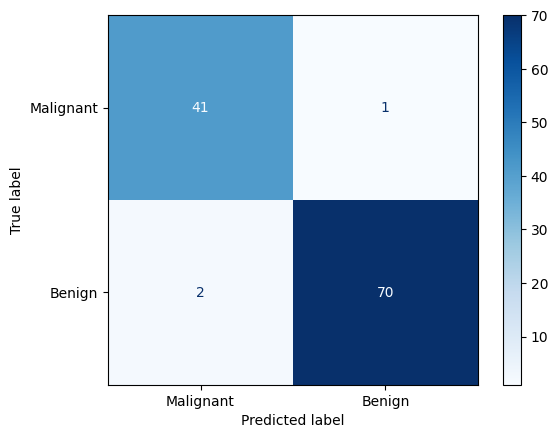

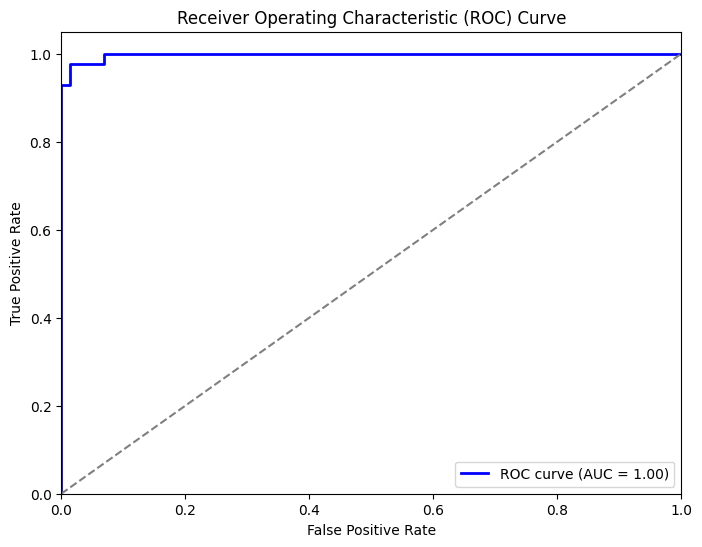

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import auc

data=pd.read_csv("C:\\Users\\surface\\project1\\data\\data.csv") # import from a csv file
data.drop("Unnamed: 32",axis=1,inplace=True) # delete unnecessary columns
data['diagnosis']=data['diagnosis'].replace({'M':1,'B':0}) 
# Select 30 features for prediction (replace with actual 30 feature column names)
prediction_var = data.columns[2:]

# Target variable (0 = Benign, 1 = Malignant)
outcome_var = 'diagnosis'

# Data Preprocessing
X = data[prediction_var]
y = data[outcome_var]

# Ensure target variable is numeric (0 and 1)
y = y.apply(pd.to_numeric, errors='coerce')

# Standardize data (important for ANN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=12, stratify=y)

# Build Optimized ANN Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Increased neurons in the input layer
    Dropout(0.3),  # Increased Dropout to prevent overfitting
    Dense(64, activation='relu'),  # Hidden layer with more neurons
    Dropout(0.3),
    Dense(32, activation='relu'),  # Hidden layer with more neurons
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer (Sigmoid activation for binary classification)
])

# Compile the model with adjusted learning rate
optimizer = Adam(learning_rate=0.001)  # Adjusting learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate the Model
y_pred_prob = model.predict(X_test).flatten()  # Get probability predictions
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to binary predictions

# Compute evaluation metrics
evaluation_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
    'ROC AUC': roc_auc_score(y_test, y_pred_prob)
}
eval_df = pd.DataFrame([evaluation_metrics])

# Display metrics
print(eval_df)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])  # Labels [1, 0] for Malignant and Benign
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Malignant', 'Benign'])
disp.plot(cmap='Blues')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  # ROC
roc_auc = auc(fpr, tpr)  # AUC

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
